In [ ]:
# for i in runs/*12__20*_w2_*/*/; do python -m playground.evaluate with experiment_dir=$i; done

In [154]:
import pandas as pd
import numpy as np
import warnings
import math
import json
import glob
import csv
import re
import os

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['png']

In [138]:
dirs = glob.glob("../runs/*12__20*_w2_*/*/") + glob.glob("../runs/*00_00__w2*/*/")
names = [re.findall("w2.*_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__20_09_08__w2_base/4/', 'base'), ('../runs/2019_07_12__20_09_08__w2_base/2/', 'base')]


In [155]:
def read_data(path, key):
    try:
        with open(os.path.join(path, "evaluate.json"), 'r') as jfile:
            return pd.DataFrame(json.load(jfile), index=[key])
    except:
        warnings.warn("Path {} did not contain {}".format(path, key))
        return pd.DataFrame()

In [156]:
read_data(dirs[0], names[0])

,torque,joint_angle,phase_plot_index
traj,9.095857,11.666614,1.662307


In [157]:
def read_column(paths, keys, column):
    return pd.concat([read_data(path, key)[column] for path, key in zip(paths, keys)])

In [145]:
read_column(dirs, names, ["joint_angle", "torque", "phase_plot_index"])[:6]

,joint_angle,torque,phase_plot_index
traj,75.553406,100.033577,0.686236
traj,136.563675,127.209236,0.879469
traj,89.211906,86.919197,0.809494
traj,81.671509,119.114098,0.440142
traj,30.465807,49.403027,0.340340
net,13.599189,102.265465,0.129201


In [116]:
read_column(dirs, names, ["joint_angle", "torque"]).groupby(level=0).mean()

,joint_angle,torque
base,61.351810,57.432961
loss,24.191665,35.844801
net,11.838698,19.327060
phase,33.349882,60.578687
traj,40.041370,44.563785
vnet-ablation,23.887738,33.803563


In [55]:
def compute_stats(xs, ys):
    grouped = {}
    for x, y in zip(xs, ys):
        if not x in grouped:
            grouped[x] = []
        grouped[x].append(y)
    keys = sorted(grouped.keys())
    xs = np.array([k for k in keys])
    means = np.array([np.mean(grouped[k]) for k in keys])
    mins = np.array([np.min(grouped[k]) for k in keys])
    maxs = np.array([np.max(grouped[k]) for k in keys])
    return xs, means, means-mins, maxs - means
        
        
def draw_barplot(dirs, names, columns, ax=None, ylabel=""):
    width = 0.2  # the width of the bars
    capsize = 3
    
    colors = ['r', 'b', 'y']
    
    index = np.arange(len(set(names)))
    
    if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111)
    
    for i, column in enumerate(columns):
        x1 = names
        y1 = read_column(dirs, column)
        x, ymean, yl, yh = compute_stats(x1, y1)

        ax.bar(index + i*width, ymean, width, yerr=[yl, yh], capsize=capsize, color=colors[i], label=column)

    ax.set_ylabel(ylabel)
    ax.set_xticks(index + width * (len(columns)/2 - 0.5))
    ax.set_xticklabels(x)
    plt.legend(loc='upper right')
    
    return ax

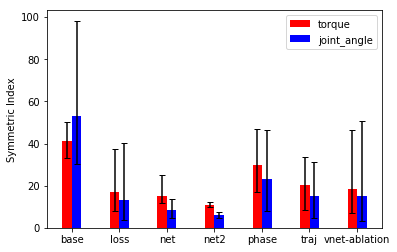

In [112]:
ax = draw_barplot(dirs, names, ["torque", "joint_angle"], ylabel="Symmetric Index")

In [143]:
dirs = glob.glob("../runs/*12__17_4*w3*/*/") + ["../runs/2019_07_12__20_35_43__w3_karen_4/1"]
names = [re.findall("w3_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__17_45_53__w3_traj/4/', 'traj'), ('../runs/2019_07_12__17_45_53__w3_traj/2/', 'traj')]


TypeError: read_column() missing 1 required positional argument: 'column'

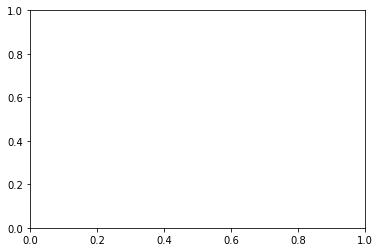

In [144]:
ax = draw_barplot(dirs, names, ["torque", "joint_angle"], ylabel="Symmetric Index")

In [7]:
dirs = ['../runs/2019_07_12__20_09_01__w2_net/1']
names = [re.findall("w2_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__20_09_01__w2_net/1', 'net')]


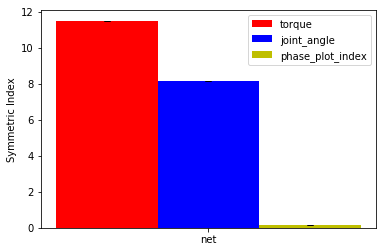

In [10]:
ax = draw_barplot(dirs, names, ["torque", "joint_angle", "phase_plot_index"], ylabel="Symmetric Index")

<BarContainer object of 3 artists>

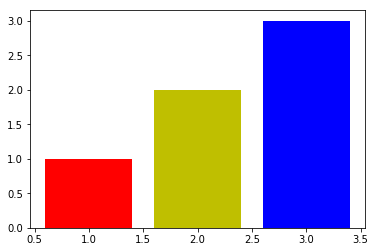

In [12]:
plt.bar([1,2,3], [1,2,3], color=['r', 'y', 'b'])

## Changing the Data Grouping

In [54]:
def group(xs, ys):
    grouped = {}
    for x, y in zip(xs, ys):
        if not x in grouped:
            grouped[x] = []
        grouped[x].append(y)
    return grouped

def compute_stats2(rows):
    means = np.array([np.mean(r) for r in rows])
    mins = np.array([np.min(r) for r in rows])
    maxs = np.array([np.max(r) for r in rows])
    return means, means-mins, maxs - means
        
        
def draw_barplot_column(dirs, names, columns, ax=None, ylabel=""):
    width = 0.2  # the width of the bars
    capsize = 3
    
    colors = [
        "#ff0000", "#00035b", "#feb308", "#1B5E20",
        "#017b92", "#a2cffe", "#ff028d", "#8b2e16",
        "#916e99", "#b9ff66", "#000000", "#7bb274",
        "#ff000d",
    ]
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    gdirs = group(names, dirs)
    
    index = np.arange(len(columns)) * width * (len(gdirs) + 2)
    
    for j, (name, ds) in enumerate(gdirs.items()):
        ys = [read_column(ds, column) for column in columns]
        ymean, yl, yh = compute_stats2(ys)

        ax.bar(
            index + j*width,
            ymean,
            yerr=[yl, yh],
            color=colors[j], label=name,
            width=width, capsize=capsize,
        )

    ax.set_ylabel(ylabel)
    ax.set_xticks(index + width * (len(gdirs)/2 - 0.5))
    ax.set_xticklabels(columns)
    plt.legend(loc='upper right')
    
    return ax

In [50]:
dirs = glob.glob("../runs/*12__17_4*w3*/*/") + ["../runs/2019_07_12__20_35_43__w3_karen_4/1"]
names = [re.findall("w3_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__17_45_53__w3_traj/4/', 'traj'), ('../runs/2019_07_12__17_45_53__w3_traj/2/', 'traj')]


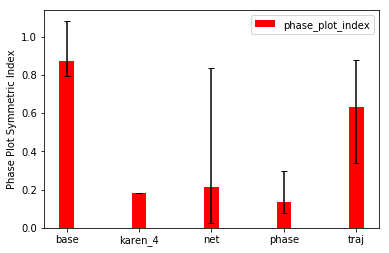

In [58]:
ax = draw_barplot(dirs, names, ["phase_plot_index"], ylabel="Phase Plot Symmetric Index")

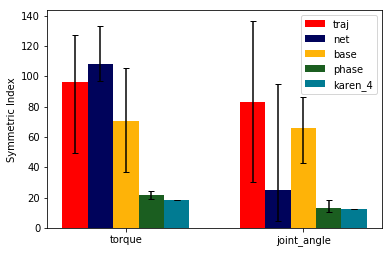

In [59]:
ax = draw_barplot_column(dirs, names, ["torque", "joint_angle",], ylabel="Symmetric Index")

In [62]:
dirs = glob.glob("../runs/*12__20*_w2_*/*/") + glob.glob("../runs/*00_00__w2*/*/")
names = [re.findall("w2.*_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__20_09_08__w2_base/4/', 'base'), ('../runs/2019_07_12__20_09_08__w2_base/2/', 'base')]


KeyError: 'phase_plot_index'

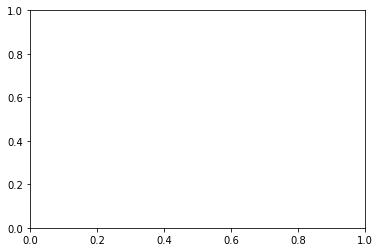

In [63]:
ax = draw_barplot(dirs, names, ["phase_plot_index"], ylabel="Phase Plot Symmetric Index")

In [119]:
def draw_barplot_column(df, ax=None):
    width = 0.2  # the width of the bars
    capsize = 3
    
    colors = [
        "#ff0000", "#00035b", "#feb308", "#1B5E20",
        "#017b92", "#a2cffe", "#ff028d", "#8b2e16",
        "#916e99", "#b9ff66", "#000000", "#7bb274",
        "#ff000d",
    ]
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    means, mins, maxs = df.mean(), df.min(), df.max()
    
    
    
    
    
#     for j, (name, ds) in enumerate(gdirs.items()):
#         ys = [read_column(ds, column) for column in columns]
#         ymean, yl, yh = compute_stats2(ys)

#         ax.bar(
#             index + j*width,
#             ymean,
#             yerr=[yl, yh],
#             color=colors[j], label=name,
#             width=width, capsize=capsize,
#         )

    ax.set_ylabel(ylabel)
    ax.set_xticks(index + width * (len(gdirs)/2 - 0.5))
    ax.set_xticklabels(columns)
    plt.legend(loc='upper right')
    
    return ax

In [9]:
df = read_column(dirs, names, ["phase_plot_index"]).groupby(level=0)

df.mean().plot(y=df.mean().columns, kind="bar")


KeyError: "None of [Index(['phase_plot_index'], dtype='object')] are in the [columns]"

In [178]:
def read_data(path, method, env):
    try:
        with open(os.path.join(path, "evaluate.json"), 'r') as jfile:
            data = json.load(jfile)
            data['method'] = method
            data['env'] = env
            return pd.DataFrame(data, index=[0])
    except:
        warnings.warn("Path {} did not contain {} in {}".format(path, method, env))
        return pd.DataFrame()

def read_paths(paths, methods, envs):
    return pd.concat([read_data(path, method, env) for path, method, env in zip(paths, methods, envs)], sort=False)

In [179]:
dirs = (
    glob.glob("../experiments/Walker2D/*/*/")
    + glob.glob("../experiments/Walker3D/*/*/")
    + glob.glob("../experiments/Stepper/*/*/")
    + glob.glob("../experiments/Cassie/*/")
)
envs = [re.findall("experiments/([^\/]*)/", path)[0] for path in dirs]

methods = [
    re.findall(env + "/.*_([^\/]*)/", path)[0]
    if env != 'Cassie' else
    re.findall(env + "/.*cassie-([a-z]*).*/", path)[0]
    
    for env, path in zip(envs, dirs)
]

df = read_paths(dirs, methods, envs)
# df

In [180]:
df.groupby(['env', 'method']).mean()

torque  joint_angle  phase_plot_index
env      method                                                 
Cassie   base            9.271694     2.968138          0.491794
         loss           15.715926     0.829299          0.313058
         net             5.145445     0.865306          0.226094
         phase           4.485516     0.357746          0.169372
         traj            6.579223     3.410600          0.407531
Stepper  base           43.284970     9.305110               NaN
         loss            6.986840     7.749153          0.460032
         net            28.619445     7.845281          0.651505
         phase           4.116924     7.576145          0.493522
         traj            7.537553     9.993236          0.569378
Walker2D base            3.974152     2.246567          1.058347
         loss            2.562192     1.982518          0.329640
         net             1.995587     1.574112          0.163102
         net2            1.042046     1.440361          0.155714
         phase           3.765920     1.664447          0.568004
         traj            3.771923     2.070963          0.386522
         vnet-ablation   1.712154     2.059981          0.281711
Walker3D base            6.360660     9.435592          2.158601
         loss            4.476573     8.648449          0.190944
         net            10.640659     7.970555          0.577831
         phase           2.546563     7.659407          0.302829
         traj            7.568836    10.815405          1.609499

In [181]:
df_mean = df.dropna().groupby(['env', 'method'], as_index=False).mean()

In [182]:
print(set(df_mean['env']), set(df_mean['method']))

df_mean[(df_mean['env'] == 'Walker2D') & (df_mean['method'] == 'net')]['torque'].item()
# df[]

{'Walker3D', 'Stepper', 'Walker2D', 'Cassie'} {'base', 'vnet-ablation', 'traj', 'phase', 'loss', 'net', 'net2'}


1.9955870985984803

In [187]:
method_map = {
    'base': 'BASE',
    'loss': 'LOSS',
    'net': 'NET',
    'phase': 'PHASE',
    'traj': 'DUP',
    'net2': 'NET-ALT',
    'vnet-ablation': 'NET-POL',
}

methods = ['base', 'traj', 'loss', 'net', 'phase', 'net2' , 'vnet-ablation']
metrics = ['torque', 'joint_angle', 'phase_plot_index']
envs = ['Walker2D', 'Walker3D', 'Stepper', 'Cassie']

tdata = np.zeros((len(metrics), len(methods), len(envs),))

for i, m in enumerate(metrics):
    for r in range(len(df_mean)):
        tdata[i, methods.index(df_mean['method'][r]), envs.index(df_mean['env'][r])] = df_mean[m][r]


for i, m in enumerate(metrics):
    print('-------------')
    print(m)
    print('& ' + ' & '.join([x for x in envs]) + r'  \\')
    print('\hline')
    for j, method in enumerate(methods):
        print(' & '.join([method_map[method]] + [('%.2f' % x) for x in tdata[i,j]]) + r'   \\')

-------------
torque
& Walker2D & Walker3D & Stepper & Cassie  \\
\hline
BASE & 3.97 & 6.36 & 0.00 & 9.27   \\
DUP & 3.77 & 7.57 & 7.54 & 6.58   \\
LOSS & 2.56 & 4.48 & 6.36 & 15.72   \\
NET & 2.00 & 10.64 & 28.97 & 5.15   \\
PHASE & 3.77 & 2.55 & 3.99 & 4.49   \\
NET-ALT & 1.04 & 0.00 & 0.00 & 0.00   \\
NET-POL & 1.71 & 0.00 & 0.00 & 0.00   \\
-------------
joint_angle
& Walker2D & Walker3D & Stepper & Cassie  \\
\hline
BASE & 2.25 & 9.44 & 0.00 & 2.97   \\
DUP & 2.07 & 10.82 & 9.99 & 3.41   \\
LOSS & 1.98 & 8.65 & 7.29 & 0.83   \\
NET & 1.57 & 7.97 & 7.81 & 0.87   \\
PHASE & 1.66 & 7.66 & 6.76 & 0.36   \\
NET-ALT & 1.44 & 0.00 & 0.00 & 0.00   \\
NET-POL & 2.06 & 0.00 & 0.00 & 0.00   \\
-------------
phase_plot_index
& Walker2D & Walker3D & Stepper & Cassie  \\
\hline
BASE & 1.06 & 2.16 & 0.00 & 0.49   \\
DUP & 0.39 & 1.61 & 0.57 & 0.41   \\
LOSS & 0.33 & 0.19 & 0.46 & 0.31   \\
NET & 0.16 & 0.58 & 0.65 & 0.23   \\
PHASE & 0.57 & 0.30 & 0.49 & 0.17   \\
NET-ALT & 0.16 & 0.00 & 0.00 & 

TypeError: 'float' object is not callable